In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Not compile to use AVX2 FMA warning handling

imdb = keras.datasets.imdb

## Training and testing data information

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print("Testing entries: {}, labels: {}".format(len(test_data), len(test_labels)))

Training entries: 25000, labels: 25000
Testing entries: 25000, labels: 25000


## Data inside the training list

In [3]:
print(train_data[1])
print(train_labels[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
0


In [6]:
print(len(train_data[0]))
print(len(test_data[0]))

218
68


In [4]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [5]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [7]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [11]:
len(train_data[0]), len(train_data[1])
print(train_data[1])

[   1  194 1153  194 8255   78  228    5    6 1463 4369 5012  134   26
    4  715    8  118 1634   14  394   20   13  119  954  189  102    5
  207  110 3103   21   14   69  188    8   30   23    7    4  249  126
   93    4  114    9 2300 1523    5  647    4  116    9   35 8163    4
  229    9  340 1322    4  118    9    4  130 4901   19    4 1002    5
   89   29  952   46   37    4  455    9   45   43   38 1543 1905  398
    4 1649   26 6853    5  163   11 3215    2    4 1153    9  194  775
    7 8255    2  349 2637  148  605    2 8003   15  123  125   68    2
 6853   15  349  165 4362   98    5    4  228    9   43    2 1157   15
  299  120    5  120  174   11  220  175  136   50    9 4373  228 8255
    5    2  656  245 2350    5    4 9837  131  152  491   18    2   32
 7464 1212   14    9    6  371   78   22  625   64 1382    9    8  168
  145   23    4 1690   15   16    4 1355    5   28    6   52  154  462
   33   89   78  285   16  145   95    0    0    0    0    0    0    0
    0 

In [13]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1
                   )

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 70us/step - loss: 0.7307 - acc: 0.5035 - val_loss: 0.6973 - val_acc: 0.4947
Epoch 2/40
15000/15000 [==============================] - 1s 46us/step - loss: 0.6921 - acc: 0.5243 - val_loss: 0.6906 - val_acc: 0.5457
Epoch 3/40
15000/15000 [==============================] - 1s 44us/step - loss: 0.6891 - acc: 0.5809 - val_loss: 0.6883 - val_acc: 0.6067
Epoch 4/40
15000/15000 [==============================] - 1s 44us/step - loss: 0.6861 - acc: 0.6410 - val_loss: 0.6853 - val_acc: 0.6529
Epoch 5/40
15000/15000 [==============================] - 1s 44us/step - loss: 0.6828 - acc: 0.6791 - val_loss: 0.6822 - val_acc: 0.6961
Epoch 6/40
15000/15000 [==============================] - 1s 44us/step - loss: 0.6790 - acc: 0.7305 - val_loss: 0.6784 - val_acc: 0.7313
Epoch 7/40
15000/15000 [==============================] - 1s 45us/step - loss: 0.6745 - acc: 0.7505 - val_loss: 0.6740 - val_acc

In [21]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 0s 19us/step
[0.30915536727905274, 0.87324]


In [29]:
history.history

{'val_loss': [0.6973392684936524,
  0.6905967485427856,
  0.688323221206665,
  0.68533844871521,
  0.6821705298423767,
  0.6783881917953491,
  0.6740377443313599,
  0.6682311828613281,
  0.66144991979599,
  0.6483688179016114,
  0.6342970924377441,
  0.6180429588317871,
  0.6012068546295166,
  0.5804332883834838,
  0.5583621867179871,
  0.5364926123619079,
  0.5146593826293945,
  0.4928626316070557,
  0.4720010633945465,
  0.4506024284362793,
  0.4305205000400543,
  0.4123825176239014,
  0.3966102372169495,
  0.38243741464614867,
  0.37028953037261964,
  0.3598680681705475,
  0.35061229538917543,
  0.34247078337669373,
  0.3358757489681244,
  0.3296261387348175,
  0.324459357881546,
  0.319805158996582,
  0.31577012209892275,
  0.3120664095878601,
  0.30865873384475706,
  0.3059247525215149,
  0.3035096168041229,
  0.30063255972862246,
  0.2987072513580322,
  0.2965848649978638],
 'val_acc': [0.4947000000476837,
  0.5457000003814697,
  0.6067,
  0.6529,
  0.6961000003814697,
  0.731300

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

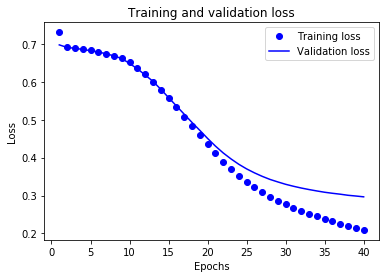

In [26]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" é para "pontos em azul"
plt.plot(epochs, loss, 'bo', label='Training loss')

# b é para "linha solida em azul"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

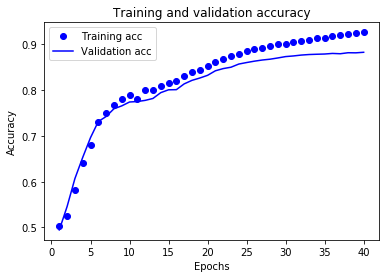

In [27]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()